<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

**Работу выполнил Михаил_Сергеев.**

Best score на kaggle: 0.85304

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# посмотрим на случайные строчки (каждая тысячная)
data[::1000]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1000,46,110.00,4874.8,Female,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1
2000,19,95.90,1777.9,Male,1,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
3000,70,19.80,1378.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4000,14,19.75,309.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
5000,3,20.25,61.45,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0


In [6]:
# вызовем метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
# для начала переведем тип объектов в TotalSpent из object во float, ошибки (это пустые значения вида ' ') обработаем nan
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
# используя методы isna() и sum(), построим таблицу с количеством nan в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
# избавимся от nan
data.dropna(subset=['TotalSpent'], inplace=True)

In [9]:
# посмотрим на наличие дубликатов
data.duplicated().sum()

14

In [10]:
# обработаем найденные повторы
data = data.drop_duplicates().reset_index(drop=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

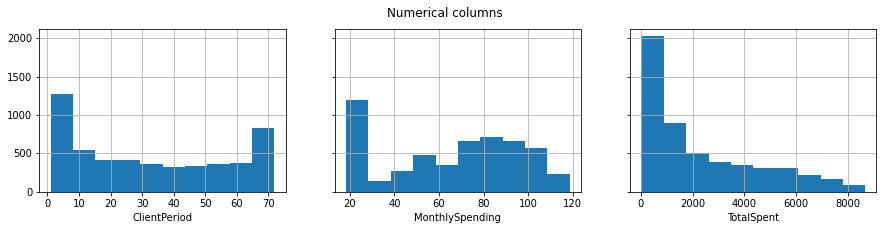

In [11]:
# 1.1) cначала построим гистограммы для численных признаков

fig, axs = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
axs[0].hist(data.ClientPeriod)
axs[0].set_xlabel('ClientPeriod')
axs[0].grid(axis = 'both')

axs[1].hist(data.MonthlySpending)
axs[1].set_xlabel('MonthlySpending')
axs[1].grid(axis = 'both')

axs[2].hist(data.TotalSpent)
axs[2].set_xlabel('TotalSpent')
axs[2].grid(axis = 'both')
fig.suptitle('Numerical columns')
None

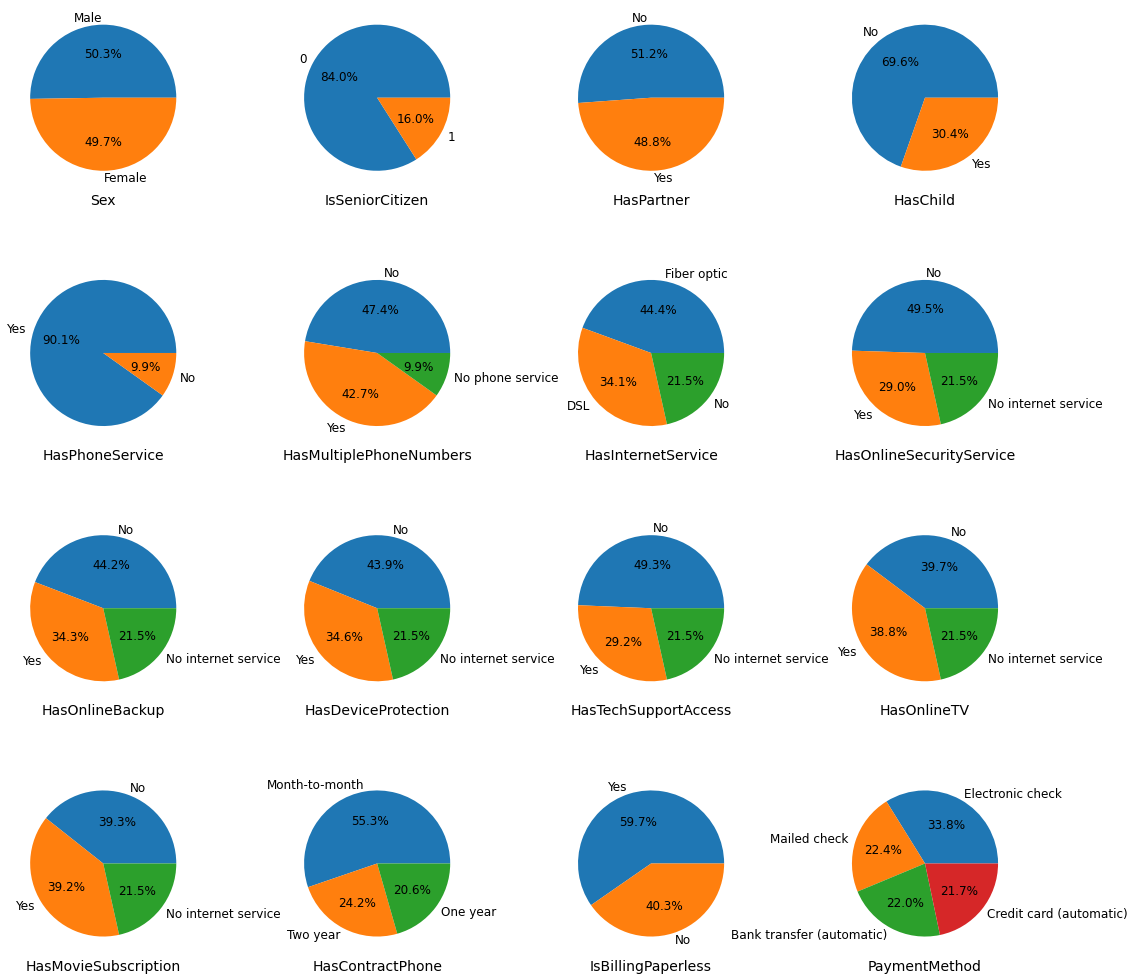

In [12]:
# 1.2) построим графики для категориальных признаков

fig, axs = plt.subplots(4, 4, figsize=(18, 18))

for ax, cat_col in zip(axs.flatten(), cat_cols):
  ax.pie(data[cat_col].value_counts(), labels=data[cat_col].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 12})
  ax.set_xlabel(cat_col, fontsize=14)

plt.subplots_adjust(wspace=0.5)

0    3885
1    1374
Name: Churn, dtype: int64

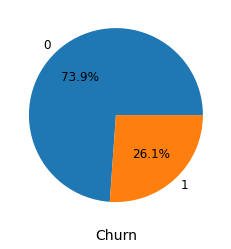

In [13]:
# 2) посмотрим на целевую переменную
plt.pie(data.Churn.value_counts(), labels=data.Churn.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.xlabel('Churn', fontsize=14)
data.Churn.value_counts()

Видно, что классы несбалансированны, отношение около 3:1. Метрика ROC_AUC должна хорошо подойти для этой задачи.

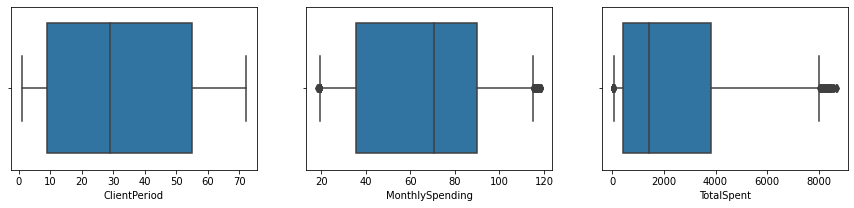

In [14]:
# 3) построим boxplot для численных переменных, используя библиотеку seaborn
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.boxplot(x=data["ClientPeriod"], whis=[5, 99], ax=axs[0])
sns.boxplot(x=data["MonthlySpending"], whis=[5, 99], ax=axs[1])
sns.boxplot(x=data["TotalSpent"], whis=[5, 99], ax=axs[2])
None

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [15]:
# посмотрим на корреляцию между числовыми признаками
data[num_cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.00,0.25,0.83
MonthlySpending,0.25,1.00,0.65
TotalSpent,0.83,0.65,1.00


Вывод: TotalSpent и ClientPeriod сильно коррелируют

In [16]:
# признак IsSeniorCitizen является категориальным, но принимает значения 0 и 1. Исправим это.
data.loc[data['IsSeniorCitizen'] > 0, 'IsSeniorCitizen'] = 'Yes'
data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [18]:
# 1) используем one-hot-encoding
num_data = data[num_cols]
cat_data = data[cat_cols]

dummy_features = pd.get_dummies(cat_data)
X = pd.concat([num_data, dummy_features], axis=1)

# сохраним исходную таблицу для будущего бустинга
X_origin = data.iloc[:, :-1]

# выделим целевую переменную
y = data[target_col]

# разделим выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
# нормируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [19]:
# 2) используем LogisticRegressionCV
clf_lr = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True, random_state=42).fit(X_train_scaled, y_train)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [20]:
print('Best score LogisticRegression: {:.4f}'.format(clf_lr.score(X_val_scaled, y_val)))
print('Best parameter LogisticRegression: {}'.format(clf_lr.C_[0]))

Best score LogisticRegression: 0.8446
Best parameter LogisticRegression: 2.782559402207126


In [21]:
# напишем функцию для отрисовки ROC-кривой
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_train, y_train_predicted, y_val, y_val_predicted):
  train_auc = roc_auc_score(y_train, y_train_predicted)
  val_auc = roc_auc_score(y_val, y_val_predicted)

  plt.figure(figsize=(10,7))
  plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
  plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='val AUC={:.4f}'.format(val_auc))
  legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
  legend_box.set_facecolor("white")
  legend_box.set_edgecolor("black")
  plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
  plt.grid(True)
  plt.show()

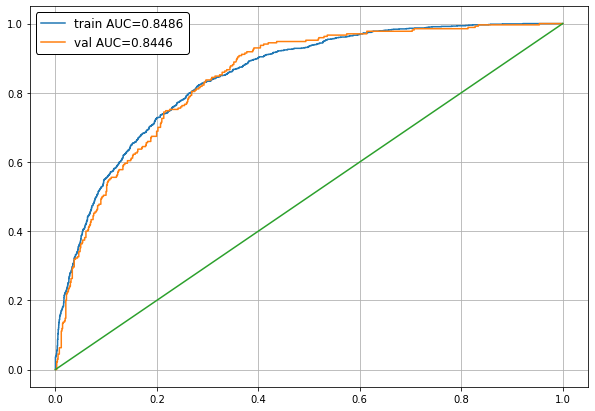

In [22]:
# построим график ROC-кривой
plot_roc_curve(y_train, clf_lr.predict_proba(X_train_scaled)[:, 1], y_val, clf_lr.predict_proba(X_val_scaled)[:, 1])

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [23]:
!pip install catboost
import catboost

     |████████████████████████████████| 66.2MB 47kB/s 


In [24]:
# 1) Попробуем catboost со стандартными параметрами:

# перед разбиением заведем список с индексами категориальных признаков
cat_indices = np.arange(3, 19)

X_train_origin, X_val_origin, _, _ = train_test_split(X_origin.values, y.values,
                                                       train_size=0.8, 
                                                       random_state=42)

boosting_model = catboost.CatBoostClassifier(cat_features=cat_indices,
                                             eval_metric='AUC', silent=True)
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_val_predicted = boosting_model.predict_proba(X_val_origin)[:, 1]

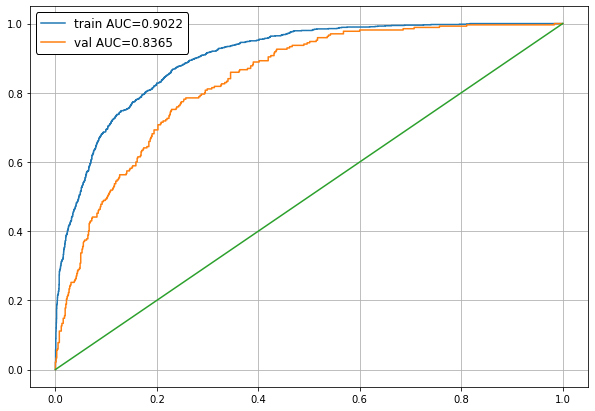

In [25]:
# построим график ROC-кривой
plot_roc_curve(y_train, y_train_predicted, y_val, y_val_predicted)

In [ ]:
# 2) Ищем оптимальные параметры. 
# Пользовался официальной документацией, в том числе этой статьей https://catboost.ai/docs/concepts/parameter-tuning.html

boosting_model = catboost.CatBoostClassifier(cat_features=cat_indices,
                                             eval_metric='AUC')
param_grid = {
    'num_trees': np.arange(200, 1000, 100),
    'learning_rate': np.linspace(0.001, 0.01, 10),
    'l2_leaf_reg': np.linspace(0, 1, 10),
    'depth': np.arange(5, 10)
    }

boosting_model.grid_search(param_grid, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

In [ ]:
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_val_predicted = boosting_model.predict_proba(X_val_origin)[:, 1]
# построим график ROC-кривой
plot_roc_curve(y_train, y_train_predicted, y_val, y_val_predicted)

**Лучшие параметры:**
   
   'depth': 6,

  'iterations': 400,

  'l2_leaf_reg': 0.0,

  'learning_rate': 0.009000000000000001

**Лучшее качество:** 0.8410

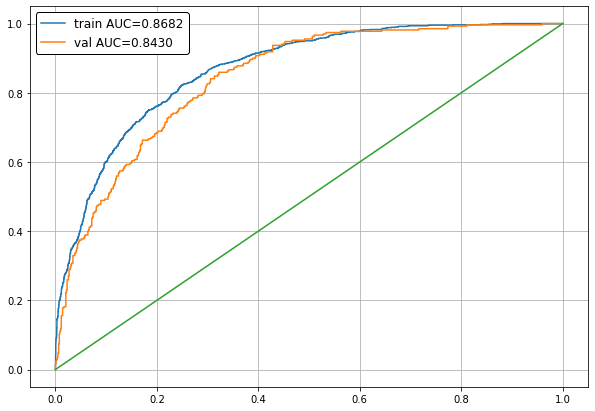

In [27]:
# еще немного тюнинга вручную 
boosting_model = catboost.CatBoostClassifier(cat_features=cat_indices, 
                                             num_trees=500,
                                             eval_metric='AUC',
                                             learning_rate=0.01,
                                             l2_leaf_reg=0.3,
                                             depth=6,
                                             random_strength=1,
                                             silent=True
                                             )
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_val_predicted = boosting_model.predict_proba(X_val_origin)[:, 1]
# построим график ROC-кривой
plot_roc_curve(y_train, y_train_predicted, y_val, y_val_predicted)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Лучшие параметры:**

'depth': 6,

'iterations': 500,

'l2_leaf_reg': 0.3,

'learning_rate': 0.01

**Лучшее качество на валидации:** 0.8430

**Качество на kaggle:** 0.85052



Мой лучший скор на kaggle 0.85304, но я бы отправил именно последнюю модель, тк, во-первых, не получилось воспроизвести тот скор (там было что-то дефолтное с catboost, но изменен один параметр), и, во-вторых, я помню, что в тот раз разница между качеством на валидации и качеством на kaggle была ощутимо больше.

# Предсказания

In [28]:
best_model = boosting_model

In [29]:
# обучим модель на всех данных
best_model.fit(X_origin, y)

In [ ]:
# Напишем функцию по предобработке тестовых данных
def preproc(data, num_cols, cat_cols, scaler):
  """
  Обрабатывает колонки TotalSpent и IsSeniorCitizen
  Применяет one_hot_encoding для категориальных призаков; 
  Нормирует, используя scaller; 
  >>> Возвращает обработанный dataframe
  """
  data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
  data.TotalSpent = data.TotalSpent.fillna(0)

  data.loc[data['IsSeniorCitizen'] > 0, 'IsSeniorCitizen'] = 'Yes'
  data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'

  # используем one-hot-encoding
  num_data = data[num_cols]
  cat_data = data[cat_cols]
  dummy_features = pd.get_dummies(cat_data)
  X = pd.concat([num_data, dummy_features], axis=1)
  
  # нормируем признаки
  X = scaler.transform(X)
  return X

In [35]:
X_test = pd.read_csv('/content/test.csv')
Id = X_test.index

# Следующие строчки для предобработки данных для логрегрессии и предсказания
# X_test_processed = preproc(X_test, num_cols, cat_cols, scaler=scaler)
# submission = pd.DataFrame({'Id': Id, 'Churn': best_model.predict_proba(X_test_processed)[:, 1]})

# Следующие строчки для catboost-модели
X_test['TotalSpent'] = X_test['TotalSpent'].replace({' ':'0'}).astype('float')
X_test.loc[X_test['IsSeniorCitizen'] > 0, 'IsSeniorCitizen'] = 'Yes'
X_test.loc[X_test['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'
submission = pd.DataFrame({'Id': Id, 'Churn': best_model.predict_proba(X_test)[:, 1]})

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   object 
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [37]:
# выгрузка сабмишена
submission.to_csv('./my_submission_boosting.csv', index=False)
from google.colab import files
files.download('my_submission_boosting.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.